# Clustering jerárquico y dendrogramas

Antes de empezar, pongamos un poco de notación para hablar todos el mismo idioma:
* X dataset (array de n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

(150, 2)


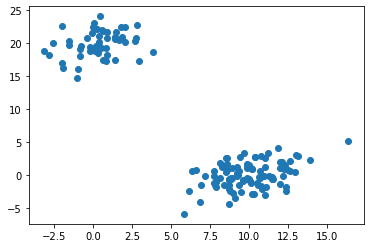

In [4]:
np.random.seed(4711)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100, ])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50, ])
X = np.concatenate((a, b))
print(X.shape)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
Z = linkage(X, "ward")
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [6]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [7]:
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

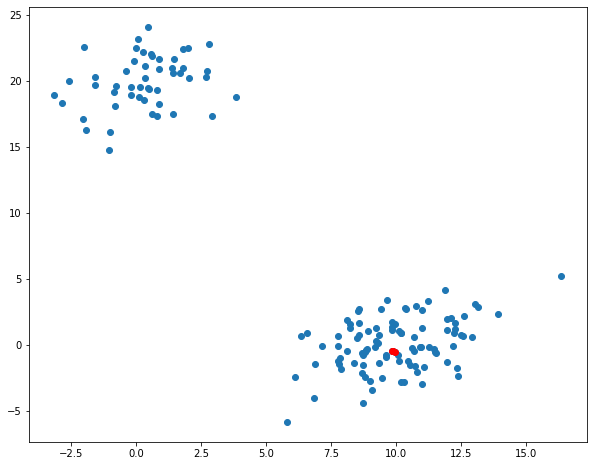

In [9]:
idx = [33, 62, 68]
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[idx, 0], X[idx, 1], c="r")
plt.show()

## Representación gráfica de un dendrograma

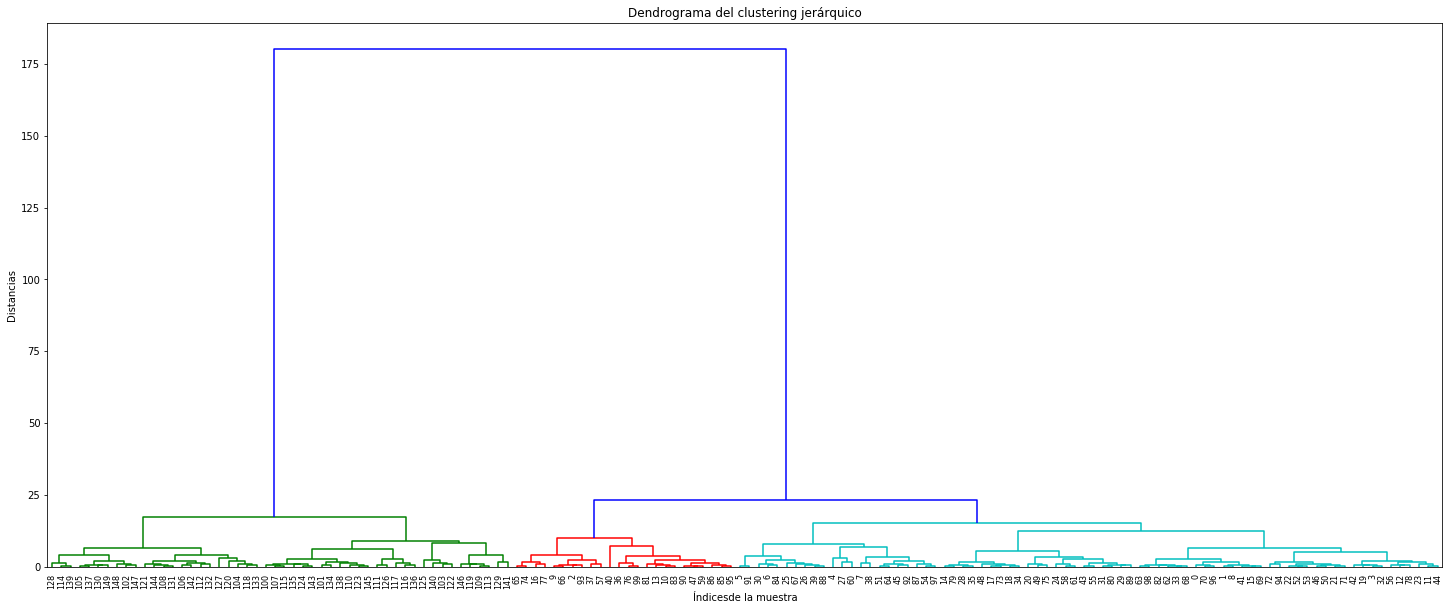

In [13]:
plt.figure(figsize=(25, 10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índicesde la muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90, leaf_font_size=8.0, color_threshold=0.1*180)
plt.show()

## Truncar el dendrograma

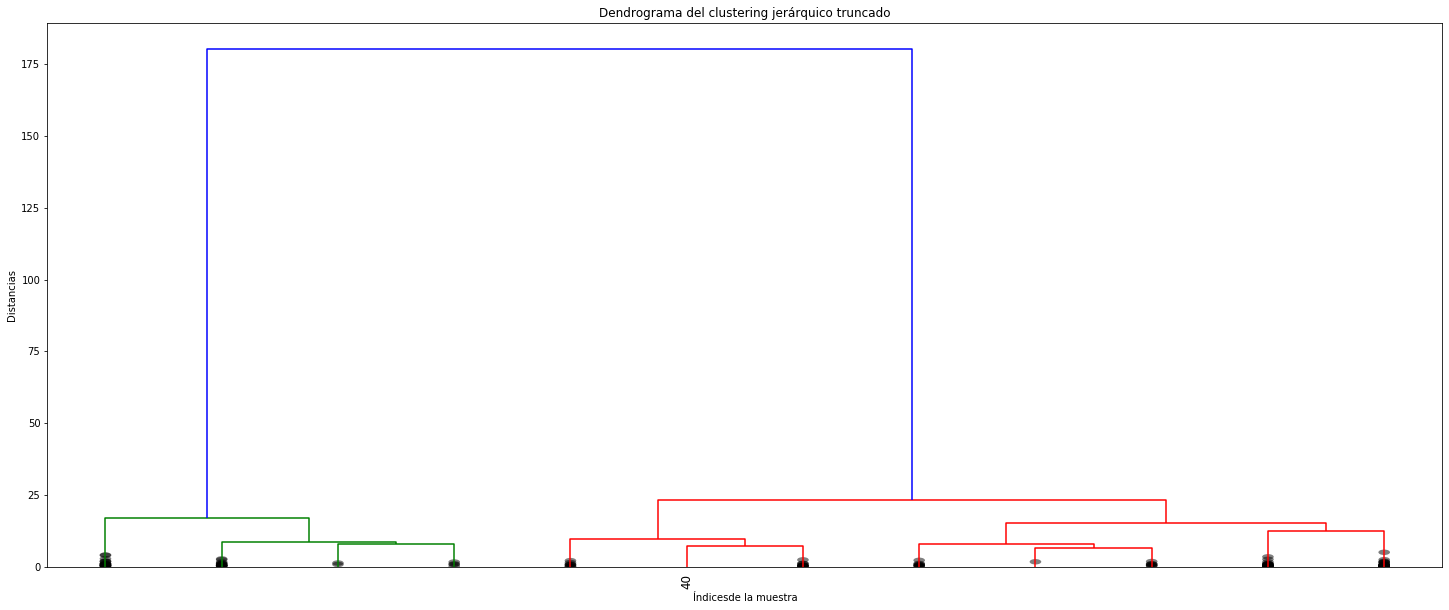

In [15]:
plt.figure(figsize=(25, 10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índicesde la muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90, leaf_font_size=12.0, color_threshold=0.7*180, truncate_mode="lastp",
           p=12, show_leaf_counts=False, show_contracted=True)
plt.show()

## Dendrograma tuneado

In [19]:
def dendrograma_tuneado(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            # i para index, d para distance, c para color
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0, -5), textcoords="offset points",
                            va="top", ha="center")
    if max_d:
        plt.axhline(y=max_d, c='k')
    
    return ddata

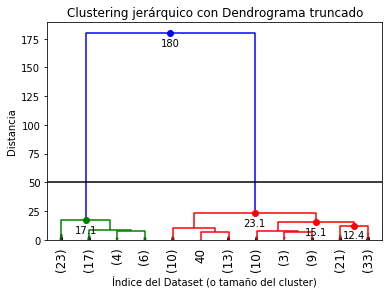

In [21]:
dendrograma_tuneado(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12.,
                   show_contracted=True, annotate_above=10, max_d=50)
plt.show()